In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
df = pd.read_csv("C:\\Users\\91901\\Downloads\\Flight_Data.csv")

In [9]:
initial_shape = df.shape
initial_shape

(301206, 13)

In [11]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,03-01-2018
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,04-01-2018
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,05-01-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301201,1300218,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Economy,113.83,1,14985,15-03-2018
301202,1300219,Air_India,AI-512,Delhi,Afternoon,one,Night,Mumbai,Economy,97.58,1,14670,16-03-2018
301203,1300220,Air_India,AI-537,Delhi,Evening,one,Morning,Mumbai,Economy,115.83,1,15195,17-03-2018
301204,1300221,Vistara,UK-977,Delhi,Evening,zero,Night,Mumbai,Economy,622.25,1,15720,18-03-2018


### Preprocessing

In [14]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'date'],
      dtype='object')

In [16]:
# removing unnecessary columns
df.drop('Unnamed: 0', axis=1, inplace=True)

### Handling missing values

In [19]:
df.isna().sum()

airline                452
flight                   0
source_city              0
departure_time           0
stops                    0
arrival_time             0
destination_city         0
class                  200
duration               250
days_left                0
price                  100
date                300848
dtype: int64

### Date column is almost empty

In [22]:
df.drop('date',axis=1, inplace =True)

### Handling continous missing value columns : Price, duration

In [25]:
df.dropna(subset= 'duration', inplace=True)

In [27]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].fillna(0).astype('int')
price_mean = df[df['price'] != 0]['price'].mean()
df.loc[df['price']==0, 'price'] = price_mean

### Handeling categorical missing values : airline, class

In [30]:
common_airline = df['airline'].value_counts().idxmax()
df['airline'] = df['airline'].replace(np.nan, common_airline)

common_class = df['class'].value_counts().idxmax()
df['class'].fillna(common_class, inplace=True)

### Handeling data type

In [33]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price               float64
dtype: object

In [35]:
df['price'] = df['price'].astype('int')

### Handeling Outliers

In [38]:
categorical_column_list = ['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city','class']

for i in categorical_column_list:
    print(i)
    print(df[i].unique())
    print('\n')

airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']


source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


stops
['zero' 'one' 'two_or_more']


arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


class
['Economy' 'Business']




### these value are valid

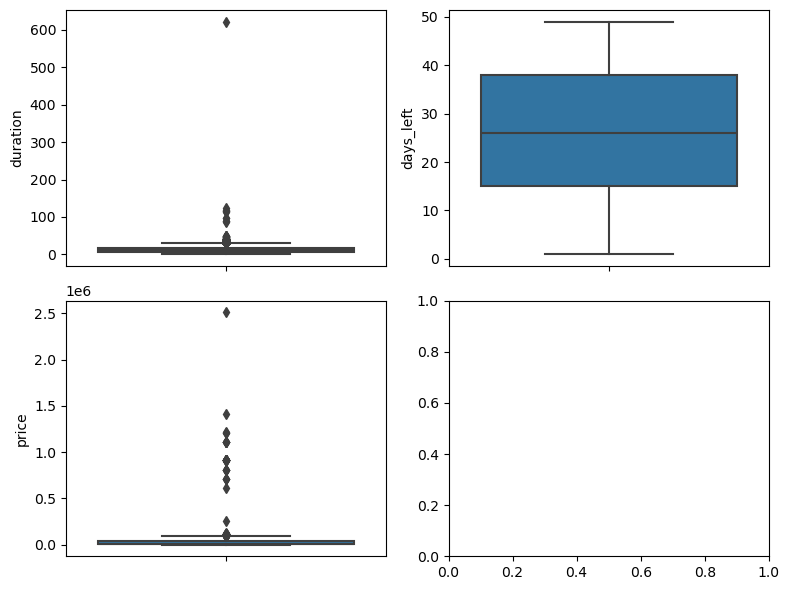

In [41]:
col = ['duration','days_left', 'price']

fig, axes = plt.subplots(2,2, figsize=(8,6))
for i, ax in zip(col, axes.flatten()):
    sns.boxplot(data =df, y=i, ax=ax)
plt.tight_layout()
plt.show()

#### Duration and price show some extreme values

#### Looking at source and destination all are domestic indian flights. duration and price values shown by circle in the plot are outliers

In [46]:
# removing outliers
outlier_columns = ['price','duration']

for i in outlier_columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

##### Adding latitude and longitude values

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298672 entries, 0 to 301154
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298672 non-null  object 
 1   flight            298672 non-null  object 
 2   source_city       298672 non-null  object 
 3   departure_time    298672 non-null  object 
 4   stops             298672 non-null  object 
 5   arrival_time      298672 non-null  object 
 6   destination_city  298672 non-null  object 
 7   class             298672 non-null  object 
 8   duration          298672 non-null  float64
 9   days_left         298672 non-null  int64  
 10  price             298672 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 26.2+ MB


## Exploratory Data Analysis

In [54]:
df.describe()

,duration,days_left,price
count,298672.000000,298672.000000,298672.000000
mean,12.081458,26.075692,20950.335606
std,6.995421,13.554989,22696.612009
min,0.830000,1.000000,1105.000000
25%,6.750000,15.000000,4769.000000
50%,11.170000,26.000000,7425.000000
75%,16.000000,38.000000,42521.000000
max,30.170000,49.000000,98972.000000


#### Is price correlated to duration

In [57]:
df[['duration','price']].corr()

,duration,price
duration,1.000000,0.215932
price,0.215932,1.000000


##### the values show very little correlation

### Price distribution

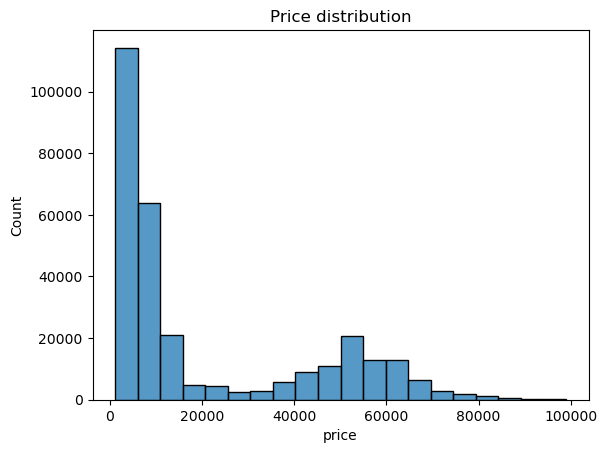

In [61]:
sns.histplot(df['price'], bins=20)
plt.title('Price distribution')
plt.show()

### Duration distribution

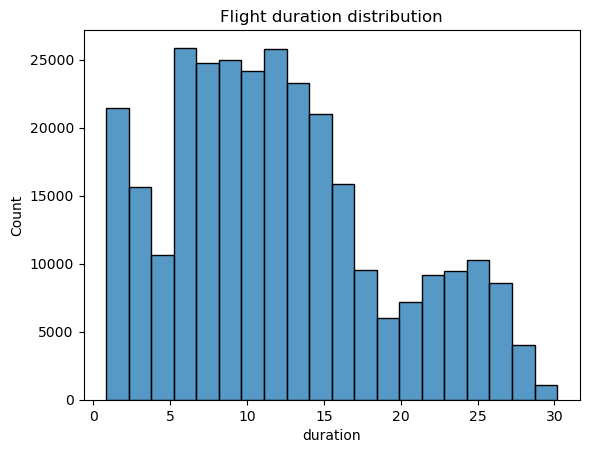

In [64]:
sns.histplot(df['duration'], bins=20)
plt.title('Flight duration distribution')
plt.show()

### Airlines and their flight count

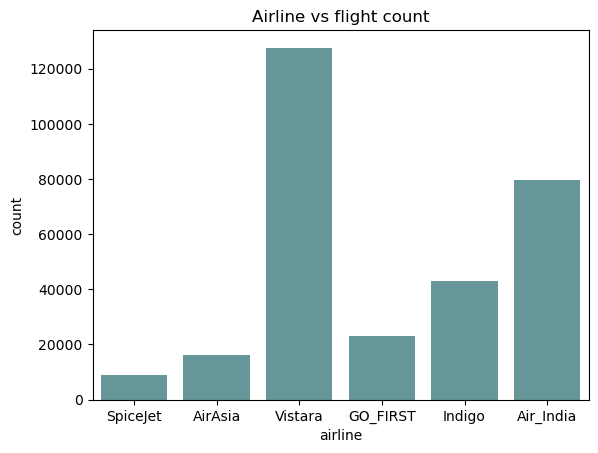

In [67]:
sns.countplot(x = 'airline', data=df, color='cadetblue')
plt.title("Airline vs flight count")
plt.show()

### How many flights depart from particular cities?

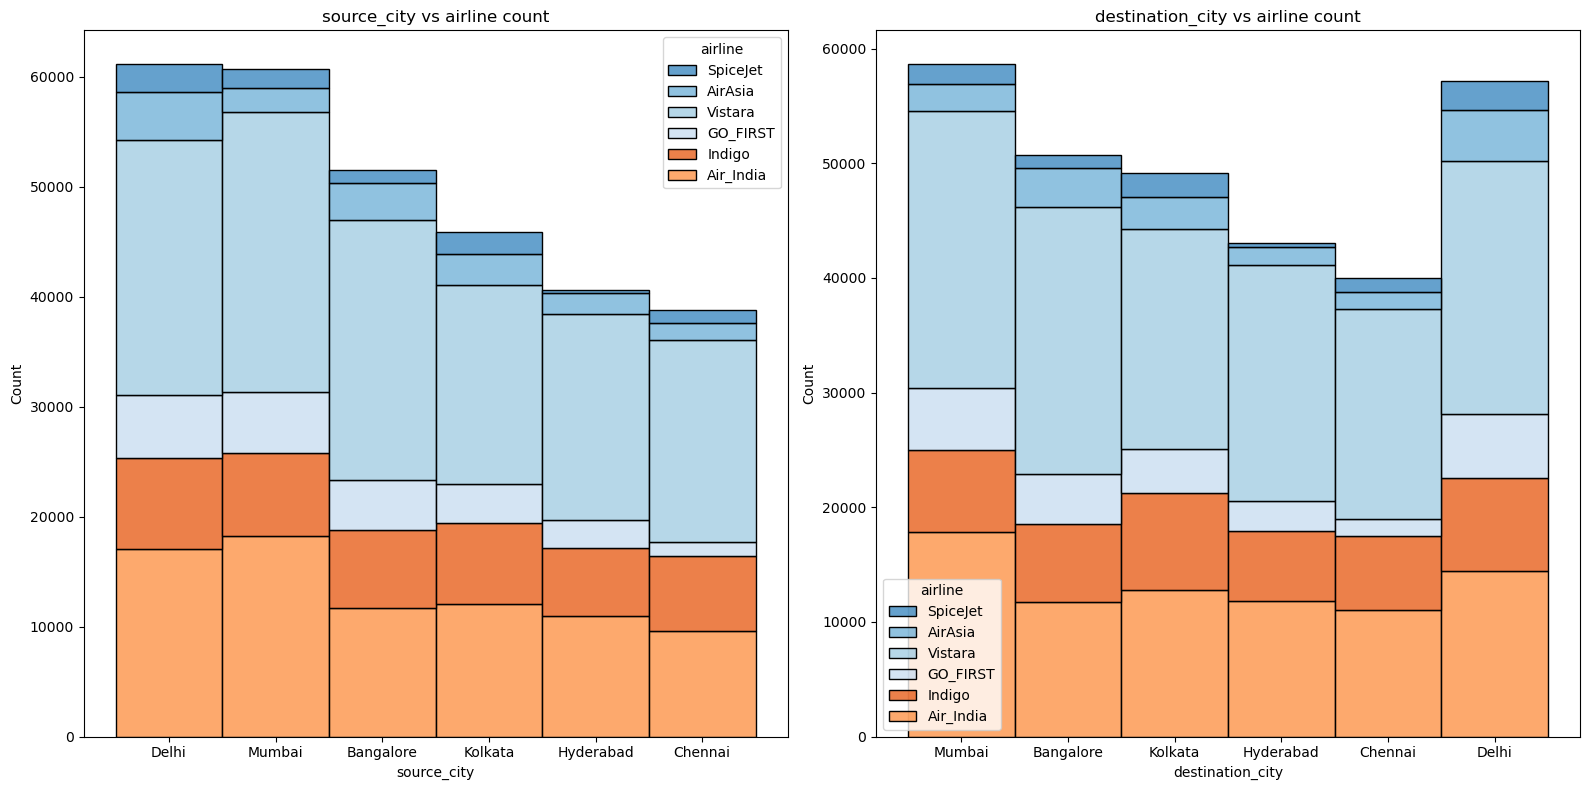

In [70]:
fig, axes= plt.subplots(1,2,figsize=(16,8))
col = ['source_city','destination_city']
for i, ax in zip(col, axes.flatten()):
    sns.histplot(x=i, multiple='stack', hue='airline', data=df, palette='tab20c', ax=ax)
    ax.set_title(f"{i} vs airline count")

plt.tight_layout()
plt.show()

### Class Analysis

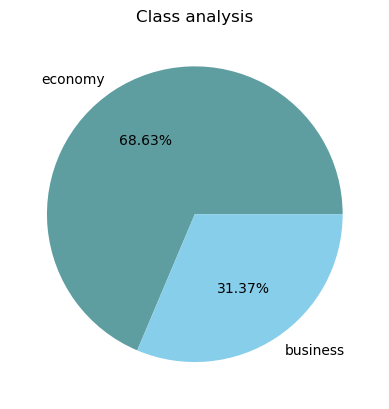

In [73]:
plt.pie(df['class'].value_counts(), colors=['cadetblue','skyblue'], labels=['economy','business'], autopct='%0.2f%%')
plt.title('Class analysis')
plt.show()

### Price according to classs

In [76]:
class_price = df.groupby(['class','airline'])['price'].mean().reset_index()
table = class_price.pivot(columns='airline', index='class').fillna(0)
table

price                                                       \
airline       AirAsia     Air_India     GO_FIRST       Indigo     SpiceJet   
class                                                                        
Business     0.000000  47093.992908     0.000000     0.000000     0.000000   
Economy   4091.072742   7285.991416  5652.007595  5324.216303  6179.278881   

                        
airline        Vistara  
class                   
Business  55278.162770  
Economy    7854.844205

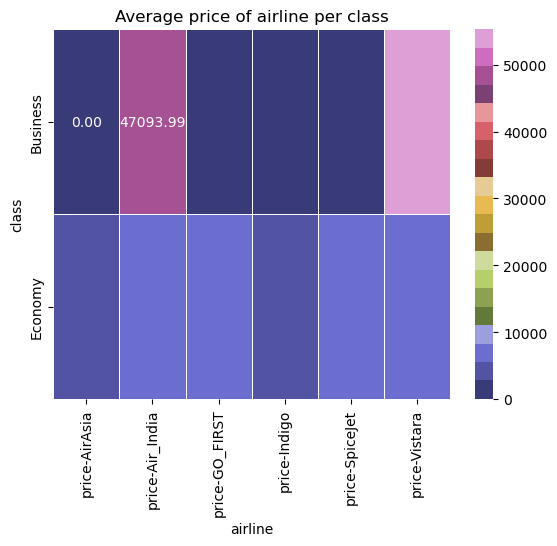

In [78]:
sns.heatmap(table, cmap='tab20b', annot=True, fmt='.2f', linewidth=0.7)
plt.xlabel('airline')
plt.title("Average price of airline per class")
plt.show()

### Departure time analysis

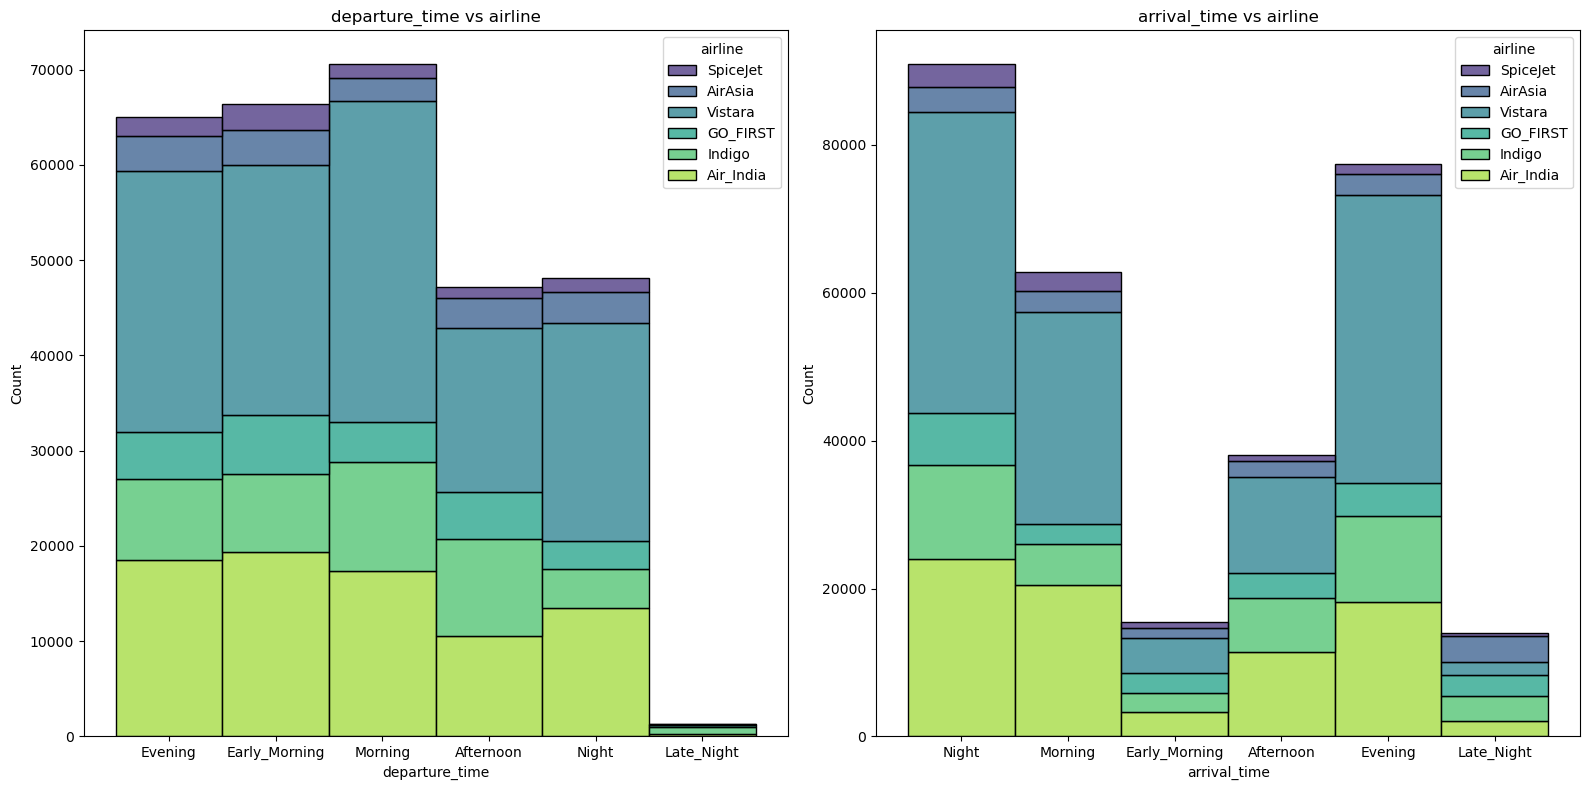

In [81]:
fig, axes= plt.subplots(1,2,figsize=(16,8))
col = ['departure_time','arrival_time']
for i, ax in zip(col, axes.flatten()):
    sns.histplot(x=i, multiple='stack', hue='airline', data=df, palette='viridis', ax=ax)
    ax.set_title(f"{i} vs airline")

plt.tight_layout()
plt.show()

### Price per airline

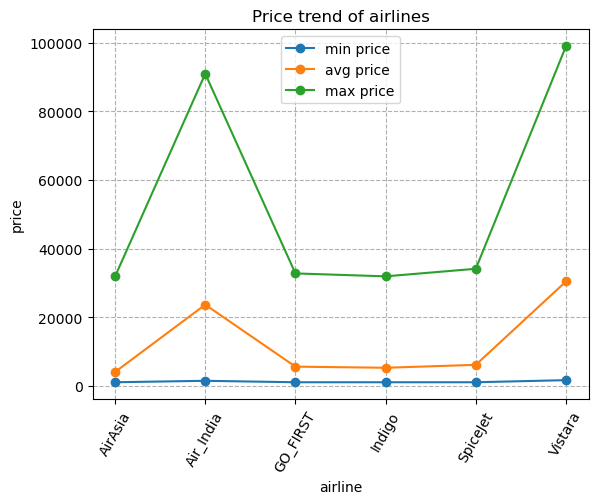

In [84]:
min_price = df.groupby('airline')['price'].min().reset_index()
max_price = df.groupby('airline')['price'].max().reset_index()
avg_price = df.groupby('airline')['price'].mean().reset_index()
labels= min_price['airline']

plt.plot(labels, min_price['price'], label='min price', marker='o')
plt.plot(avg_price['price'], label='avg price', marker='o')
plt.plot(max_price['price'], label='max price', marker='o')

plt.title('Price trend of airlines')
plt.xlabel("airline")
plt.ylabel("price")
plt.legend()
plt.xticks(rotation=60)
plt.grid(True, linestyle='--')
plt.show()

### Price trend according to days left

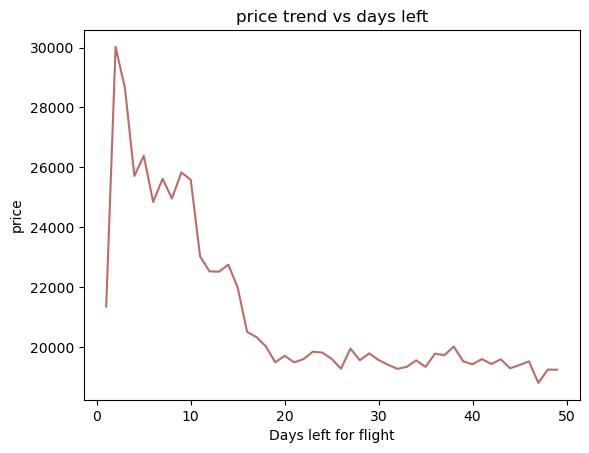

In [87]:
price_trend = df.groupby('days_left')['price'].mean().reset_index()
labels = price_trend['days_left']
plt.plot(labels, price_trend['price'], color='brown',alpha=0.7)
plt.title("price trend vs days left")
plt.xlabel("Days left for flight")
plt.ylabel('price')
plt.show()

### Percentage of flights with layovers

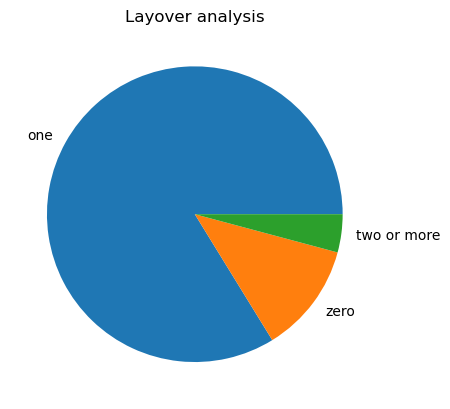

In [90]:
plt.pie(df['stops'].value_counts(), labels=['one','zero','two or more'])
plt.title("Layover analysis")
plt.show()

In [92]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
